# Experiment 4
## Build a Classifier using Logistic Regression, K-nearest Neighbour/Decision Tree to classify whether the given user will purchase a product or not from a social networking dataset.

## Importing Required Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Algorithms

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

## Importing other required functions
## For Training and Testing and checking accuracy

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Loading CSV File/Dataset

In [5]:
# Reading CSV file
df = pd.read_csv("/content/Social_Network_Ads.csv")

# Printing Dataset
print("Dataframe is:\n")
print(df)

Dataframe is:

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


## Seeing Columns of dataset

In [ ]:
print("Columns of dataset are:\n")
print(df.columns)

Columns of dataset are:

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')


## Seeing Descriptive Statistics for dataset

In [ ]:
print("Descriptive Statistics for dataset:\n")
print(df.describe(include = 'all' ))

Descriptive Statistics for dataset:

             User ID  Gender         Age  EstimatedSalary   Purchased
count   4.000000e+02     400  400.000000       400.000000  400.000000
unique           NaN       2         NaN              NaN         NaN
top              NaN  Female         NaN              NaN         NaN
freq             NaN     204         NaN              NaN         NaN
mean    1.569154e+07     NaN   37.655000     69742.500000    0.357500
std     7.165832e+04     NaN   10.482877     34096.960282    0.479864
min     1.556669e+07     NaN   18.000000     15000.000000    0.000000
25%     1.562676e+07     NaN   29.750000     43000.000000    0.000000
50%     1.569434e+07     NaN   37.000000     70000.000000    0.000000
75%     1.575036e+07     NaN   46.000000     88000.000000    1.000000
max     1.581524e+07     NaN   60.000000    150000.000000    1.000000


## Seeing Missing Data

In [ ]:
print("Missing Data for dataset is:\n")
print(df.isna().sum())

Missing Data for dataset is:

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


## Since their is no missing data for this dataset, we can apply the ML model
## Data is already cleaned, no preprocessing required
## But the Gender column has categorical values we need to encode that

In [6]:
# First making a dictionary to store values
dict_Gender = {'Female' : 0, 'Male' : 1}

df['Gender'] = df['Gender'].map(dict_Gender)

# Printing Gender after encoding
print("Column Gender after encoding is:\n", df['Gender'])

Column Gender after encoding is:
 0      1
1      1
2      0
3      0
4      1
      ..
395    0
396    1
397    0
398    1
399    0
Name: Gender, Length: 400, dtype: int64


## Seeing the Count of Values
### Here the count of one value is way greater than other and it will lead to overfitting we need to balance this class imbalance

In [7]:
print(df['Purchased'].value_counts())

0    257
1    143
Name: Purchased, dtype: int64


## Handling Class Imbalance

In [8]:
# Balancing the dataset
# First we will extract the Purchased and Not Purchased Data
Not_Purchased_data = df[df.Purchased == 0]
Purchased_data = df[df.Purchased == 1]

## Description of Class

In [9]:
# Seeing the description of this dataset now
print("Mathematical Description of Not Purchased Data is:\n")
print(Not_Purchased_data.describe())
print("\nMathematical Description of Purchased Data is:\n")
print(Purchased_data.describe())

Mathematical Description of Not Purchased Data is:

            User ID      Gender         Age  EstimatedSalary  Purchased
count  2.570000e+02  257.000000  257.000000       257.000000      257.0
mean   1.569116e+07    0.505837   32.793774     60544.747082        0.0
std    7.208696e+04    0.500941    7.985844     24351.570102        0.0
min    1.556669e+07    0.000000   18.000000     15000.000000        0.0
25%    1.562451e+07    0.000000   26.000000     44000.000000        0.0
50%    1.569326e+07    1.000000   34.000000     61000.000000        0.0
75%    1.575387e+07    1.000000   38.000000     77000.000000        0.0
max    1.581482e+07    1.000000   59.000000    141000.000000        0.0

Mathematical Description of Purchased Data is:

            User ID      Gender         Age  EstimatedSalary  Purchased
count  1.430000e+02  143.000000  143.000000       143.000000      143.0
mean   1.569222e+07    0.461538   46.391608     86272.727273        1.0
std    7.112851e+04    0.500271    

In [10]:
# Comparing the values for both transactions Purchased and Not Purchased
print("Mean for Not Purchased data(0) and Purchased(1) is: ")
df.groupby('Purchased').mean()

Mean for Not Purchased data(0) and Purchased(1) is: 


,User ID,Gender,Age,EstimatedSalary
Purchased,,,,
0,1.569116e+07,0.505837,32.793774,60544.747082
1,1.569222e+07,0.461538,46.391608,86272.727273


## Now this is under sampling so we will extract the same number of rows for both values

In [12]:
# We are using the sample function for extracting data
# 492 rows are selected because the number of Fraud data is 492
# To ensure correct fitting of model we will take the same number of rows for both Fraud and Not Fraud Data
Not_Purchased_Sample = Not_Purchased_data.sample(n=143)

# Now finally we will concatenate both the samples for Fraud and Not Fraud data
Updated_df = pd.concat([Not_Purchased_Sample, Purchased_data], axis=0)

# Now seeing the counts in the new dataframe
print("Number/Count of Purchased and Not Purchased Data values in Updated Dataframe is:\n")
print(Updated_df['Purchased'].value_counts())

# Checking the mean for both Purchased and Not Purchased Data for the Updated values
# Comparing the values for both transactions Fraud and Not fraud
# We can see that the overall properties of dataframe has not changed
# Thus now we can use this dataset for our model
print("\nMean for Not Purchased data(0) and Purchased(1) is:\n ")
print(Updated_df.groupby('Purchased').mean())

Number/Count of Purchased and Not Purchased Data values in Updated Dataframe is:

0    143
1    143
Name: Purchased, dtype: int64

Mean for Not Purchased data(0) and Purchased(1) is:
 
                User ID    Gender        Age  EstimatedSalary
Purchased                                                    
0          1.568862e+07  0.496503  32.314685     60363.636364
1          1.569222e+07  0.461538  46.391608     86272.727273


## Now we will do feature extraction or in other words we will extract input and output features for our models

In [13]:
# Defining Input Feature
X = Updated_df.drop(columns = ['User ID', 'Purchased'], axis = 1)

# Defining Output Feature
Y = Updated_df['Purchased']

# Printing Input and Output
print("Input is:\n", X, "\nOutput is:\n", Y)

Input is:
      Gender  Age  EstimatedSalary
305       1   42            54000
5         1   27            58000
288       1   41            79000
96        0   35            25000
314       0   39            79000
..      ...  ...              ...
393       1   60            42000
395       0   46            41000
396       1   51            23000
397       0   50            20000
399       0   49            36000

[286 rows x 3 columns] 
Output is:
 305    0
5      0
288    0
96     0
314    0
      ..
393    1
395    1
396    1
397    1
399    1
Name: Purchased, Length: 286, dtype: int64


## Importing PCA(Principal Component Analysis)

In [19]:
# Importing PCA
from sklearn.decomposition import PCA

# Making Object of PCA
pca = PCA(n_components = 2 )

# PCA of Input Data
pca_data = pca.fit(X).transform(X)

## Visualization of Original Dataset

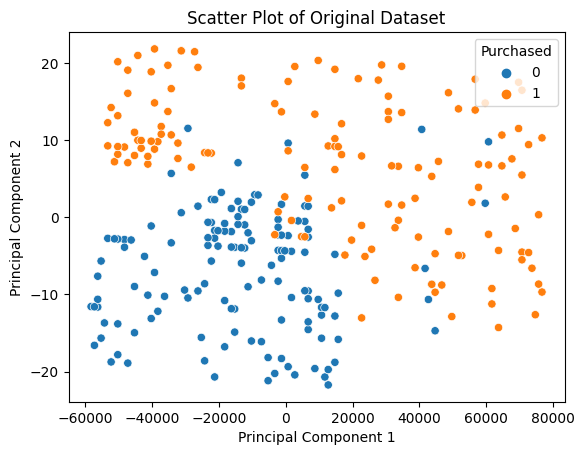

In [21]:
sns.scatterplot(x = pca_data[:,0], y = pca_data[:,1] , data = pca_data, hue = Y )

# Adding Labels
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Adding Title
plt.title("Scatter Plot of Original Dataset")

# Add a legend with a heading
legend = plt.legend(loc='upper right')
legend.set_title("Purchased")

## Now we will split into Testing and Training Data

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8)

## Applying K-Nearest Neighbor Model

In [15]:
# Using with by default parameters
knn = KNeighborsClassifier()

# Training Classifier
knn.fit(x_train, y_train)

KNeighborsClassifier()

## Testing Accuracy

In [16]:
# Training Accuracy
knn_Train_pred = knn.predict(x_train)

print("Training Accuracy of K-Nearest Neighbor Model is:", accuracy_score(y_train, knn_Train_pred)* 100)

# Testing Accuracy
knn_Test_pred = knn.predict(x_test)

print("\nTesting Accuracy of K-Nearest Neighbor Model is:", accuracy_score(y_test, knn_Test_pred)* 100)

Training Accuracy of K-Nearest Neighbor Model is: 86.8421052631579

Testing Accuracy of K-Nearest Neighbor Model is: 84.48275862068965


## Seeing Other Measures

In [17]:
print("Classification Report of Logistic Regression Model is:\n\n", classification_report(y_test, knn_Test_pred))
print("Confusion Matrix is:\n\n", confusion_matrix(y_test, knn_Test_pred))

Classification Report of Logistic Regression Model is:

               precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.83      0.86      0.85        29

    accuracy                           0.84        58
   macro avg       0.85      0.84      0.84        58
weighted avg       0.85      0.84      0.84        58

Confusion Matrix is:

 [[24  5]
 [ 4 25]]


## K Nearest Neighbor

## For Training Set

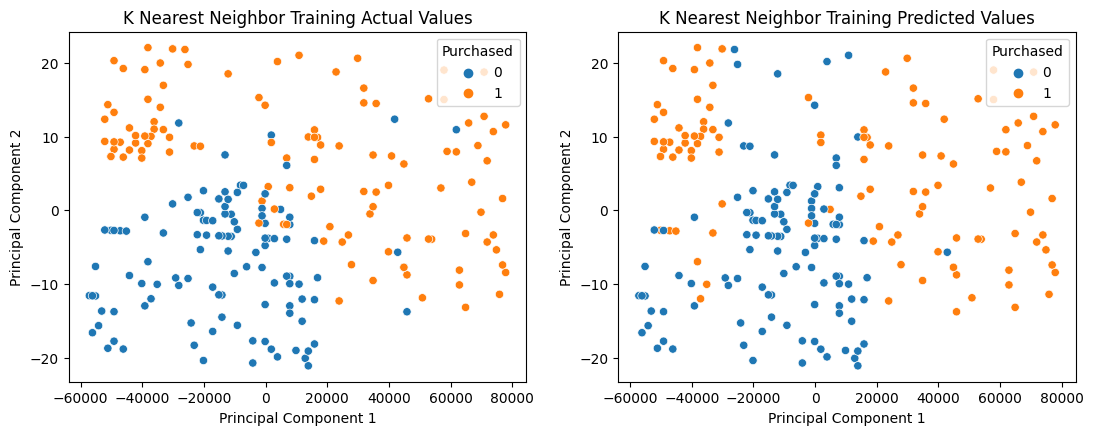

In [22]:
# PCA of Input Data
pca_data = pca.fit(x_train).transform(x_train)

# Create a figure for the subplots
plt.figure(figsize=(13, 10))

plt.subplot(2,2,1)

# Plot 1
# Actual Values in Testing Set
sns.scatterplot(x = pca_data[:,0], y = pca_data[:,1] , data = pca_data, hue = y_train )

# Adding Labels
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Adding Title
plt.title("K Nearest Neighbor Training Actual Values")

# Add a legend with a heading
legend = plt.legend(loc='upper right')
legend.set_title("Purchased")

plt.subplot(2,2,2)
# Plot 2
# Predicted Values in Testing Set
sns.scatterplot(x = pca_data[:,0], y = pca_data[:,1] , data = pca_data, hue = knn_Train_pred )

# Adding Labels
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Adding Title
plt.title("K Nearest Neighbor Training Predicted Values")

# Add a legend with a heading
legend = plt.legend(loc='upper right')
legend.set_title("Purchased")

## For Testing Set

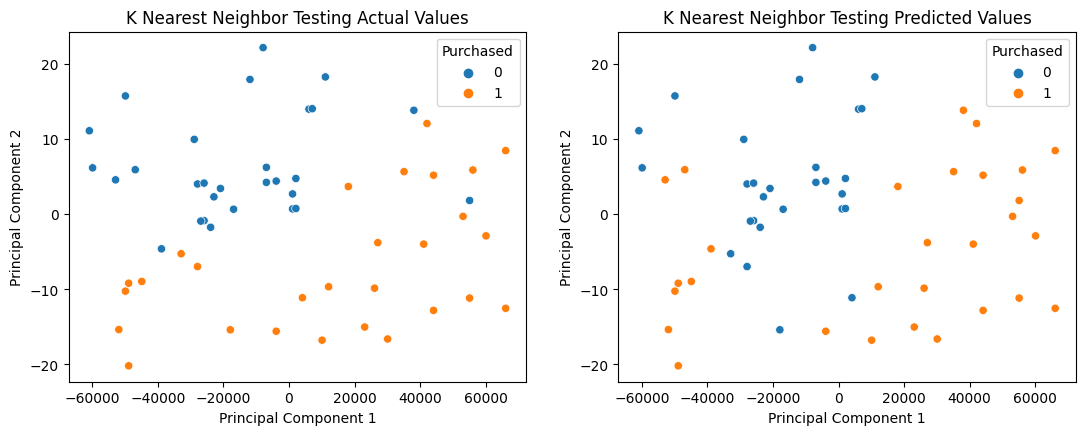

In [23]:
# PCA of Input Data
pca_data = pca.fit(x_test).transform(x_test)

# Create a figure for the subplots
plt.figure(figsize=(13, 10))

plt.subplot(2,2,1)

# Plot 1
# Actual Values in Testing Set
sns.scatterplot(x = pca_data[:,0], y = pca_data[:,1] , data = pca_data, hue = y_test )

# Adding Labels
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Adding Title
plt.title("K Nearest Neighbor Testing Actual Values")

# Add a legend with a heading
legend = plt.legend(loc='upper right')
legend.set_title("Purchased")

plt.subplot(2,2,2)
# Plot 2
# Predicted Values in Testing Set
sns.scatterplot(x = pca_data[:,0], y = pca_data[:,1] , data = pca_data, hue = knn_Test_pred )

# Adding Labels
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Adding Title
plt.title("K Nearest Neighbor Testing Predicted Values")

# Add a legend with a heading
legend = plt.legend(loc='upper right')
legend.set_title("Purchased")

## Since the accuracy is less, we will use do hyperparameter tuning using RandomizedSearchCV or GridSearchCV

RandomizedSearchCV and GridSearchCV are two common techniques used for hyperparameter tuning in machine learning. Here are the key differences between the two with descriptions:

**GridSearchCV:**

- **Exhaustive Search:** GridSearchCV performs an exhaustive search over all possible hyperparameter combinations within the specified parameter grid. It evaluates each combination using cross-validation.

- **Regular Grid:** It uses a regular grid structure to sample hyperparameters. This means that it considers all possible combinations by iterating over all values for each hyperparameter, which can be computationally expensive.

- **Parameter Space Exploration:** GridSearchCV is best suited when you have a good understanding of the parameter space and want to explore it systematically to find the best combination of hyperparameters.

- **Complete Search:** It guarantees that the best hyperparameter combination is found within the specified grid.

- **Computational Intensity:** GridSearchCV can be computationally intensive, especially when the parameter grid is large.

- **Higher Control:** It provides fine-grained control over the search space and ensures all hyperparameter combinations are evaluated.

**RandomizedSearchCV:**

- **Randomized Sampling:** RandomizedSearchCV, on the other hand, randomly samples hyperparameters from the specified parameter distributions. It doesn't exhaustively explore all combinations.

- **Hyperparameter Distributions:** Instead of specifying exact values, you define distributions or ranges for hyperparameters. RandomizedSearchCV randomly selects values from these distributions for each iteration.

- **Efficiency:** RandomizedSearchCV is more computationally efficient than GridSearchCV because it doesn't evaluate all possible combinations. It samples a limited number of combinations, making it suitable for large parameter spaces.

- **Exploration vs. Exploitation:** It strikes a balance between exploring the parameter space and exploiting areas that seem promising. This randomness can be useful in finding good hyperparameter combinations quickly.

- **No Guarantee:** RandomizedSearchCV does not guarantee finding the best combination. However, it often finds good combinations efficiently and is particularly useful when computational resources are limited.

- **Best Used When:** It is suitable when you want to quickly identify a reasonably good set of hyperparameters without performing an exhaustive search. It's often used as an initial step in the hyperparameter tuning process.

In summary, the choice between GridSearchCV and RandomizedSearchCV depends on your specific needs. If you have the computational resources and want to explore all possible combinations systematically, GridSearchCV may be appropriate. If you want a more efficient search and are open to a bit of randomness in the process, RandomizedSearchCV can be a good choice, particularly when you have a large parameter space or limited computational resources.

## Using Randomized search it will generate a different result each time

In [28]:
# Importing RandomizedSearchCV for Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

# Importing randint for trying for all possible values of number of neighbors
from scipy.stats import randint

# Initializing Model Parameters
param_dist = {
    'n_neighbors': randint(1, 20),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Initializing object of class
# cv is cross validatation i.e in how many  folds our data is divided for cross validation
random_search = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_dist, n_iter=10, cv=5)
# Passing arguments to function
random_search.fit(x_train, y_train)

best_params = random_search.best_params_

print("Best Hyperparameters for the model according to Random Search are:",best_params)

Best Hyperparameters for the model according to Random Search are: {'n_neighbors': 1, 'p': 1, 'weights': 'distance'}


## Since we have find the best parameters now we can use them

In [ ]:
# Creating a KNN classifier with the best hyperparameters
knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'], p=best_params['p'])

# Training Classifier
knn.fit(x_train, y_train)

KNeighborsClassifier(weights='distance')

## Testing Accuracy after Hyperparameter Tuning

In [ ]:
# Training Accuracy
knn_Train_pred = knn.predict(x_train)

print("Training Accuracy of K-Nearest Neighbor Model is:", accuracy_score(y_train, knn_Train_pred)* 100)

# Testing Accuracy
Test_pred = knn.predict(x_test)

print("\nTesting Accuracy of K-Nearest Neighbor Model is:", accuracy_score(y_test, knn_Test_pred)* 100)

Training Accuracy of K-Nearest Neighbor Model is: 100.0

Testing Accuracy of K-Nearest Neighbor Model is: 79.3103448275862


## Seeing Other Measures

In [ ]:
print("Classification Report of K Nearest Neighbor Model is:\n\n", classification_report(y_test, knn_Test_pred))
print("Confusion Matrix is:\n\n", confusion_matrix(y_test, knn_Test_pred))

Classification Report of K Nearest Neighbor Model is:

               precision    recall  f1-score   support

           0       0.83      0.78      0.81        32
           1       0.75      0.81      0.78        26

    accuracy                           0.79        58
   macro avg       0.79      0.79      0.79        58
weighted avg       0.80      0.79      0.79        58

Confusion Matrix is:

 [[25  7]
 [ 5 21]]


## Grid Search will generate only one result each time after trying all possible combinations

In [29]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Create the KNN classifier
model = KNeighborsClassifier()

# Choose either GridSearchCV or RandomizedSearchCV
# Grid search:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
# best_params = random_search.best_params_

# Train a KNN classifier with the best hyperparameters
best_model = KNeighborsClassifier(**best_params)

print("Best Hyperparameters for the model according to Grid Search are:",best_params)

Best Hyperparameters for the model according to Grid Search are: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


In [30]:
# Creating a KNN classifier with the best hyperparameters
knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'], p=best_params['p'])

# Training Classifier
knn.fit(x_train, y_train)

# Training Accuracy
knn_Train_pred = knn.predict(x_train)

print("Training Accuracy of K-Nearest Neighbor Model is:", accuracy_score(y_train, knn_Train_pred)* 100)

# Testing Accuracy
Test_pred = knn.predict(x_test)

print("\nTesting Accuracy of K-Nearest Neighbor Model is:", accuracy_score(y_test, knn_Test_pred)* 100)

Training Accuracy of K-Nearest Neighbor Model is: 88.1578947368421

Testing Accuracy of K-Nearest Neighbor Model is: 84.48275862068965


In [31]:
print("Classification Report of K Nearest Neighbor Model is:\n\n", classification_report(y_test, knn_Test_pred))
print("Confusion Matrix is:\n\n", confusion_matrix(y_test, knn_Test_pred))

Classification Report of K Nearest Neighbor Model is:

               precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.83      0.86      0.85        29

    accuracy                           0.84        58
   macro avg       0.85      0.84      0.84        58
weighted avg       0.85      0.84      0.84        58

Confusion Matrix is:

 [[24  5]
 [ 4 25]]


## Applying Logistic Regression

In [33]:
lr = LogisticRegression()

# Training Classifier
lr.fit(x_train, y_train)

LogisticRegression()

## Checking Accuracy

In [34]:
# Training Accuracy
lr_Train_pred = lr.predict(x_train)

print("Training Accuracy of Logistic Regression Model is:", accuracy_score(y_train, lr_Train_pred)* 100)

# Testing Accuracy
lr_Test_pred = lr.predict(x_test)

print("\nTesting Accuracy of Logistic Regression Model is:", accuracy_score(y_test, lr_Test_pred)* 100)

Training Accuracy of Logistic Regression Model is: 68.85964912280701

Testing Accuracy of Logistic Regression Model is: 60.3448275862069


## Seeing other Measures

In [35]:
print("Classification Report of Logistic Regression Model is:\n\n", classification_report(y_test, lr_Test_pred))

print("Confusion Matrix is:\n\n", confusion_matrix(y_test, lr_Test_pred))

Classification Report of Logistic Regression Model is:

               precision    recall  f1-score   support

           0       0.65      0.45      0.53        29
           1       0.58      0.76      0.66        29

    accuracy                           0.60        58
   macro avg       0.61      0.60      0.59        58
weighted avg       0.61      0.60      0.59        58

Confusion Matrix is:

 [[13 16]
 [ 7 22]]


## Data Visualization Logistic Regression

## For Training Set

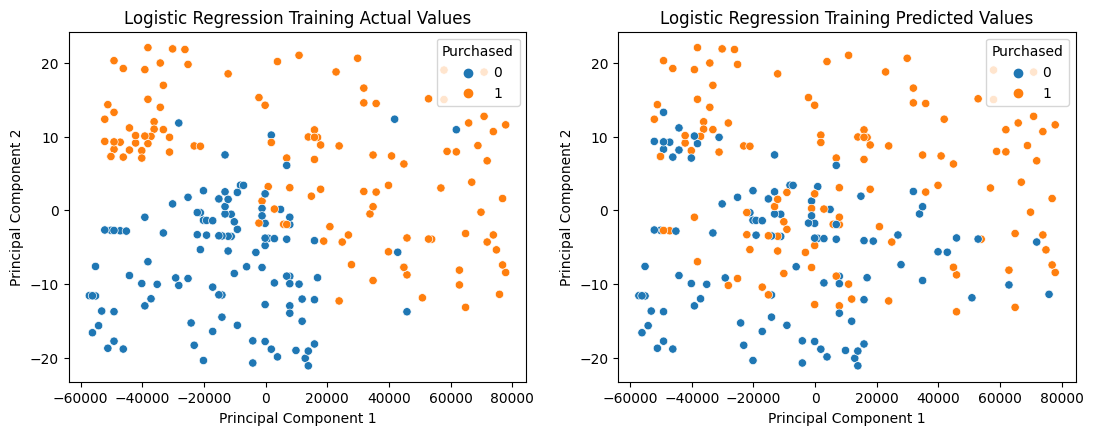

In [36]:
# PCA of Input Data
pca_data = pca.fit(x_train).transform(x_train)

# Create a figure for the subplots
plt.figure(figsize=(13, 10))

plt.subplot(2,2,1)

# Plot 1
# Actual Values in Testing Set
sns.scatterplot(x = pca_data[:,0], y = pca_data[:,1] , data = pca_data, hue = y_train )

# Adding Labels
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Adding Title
plt.title("Logistic Regression Training Actual Values")

# Add a legend with a heading
legend = plt.legend(loc='upper right')
legend.set_title("Purchased")

plt.subplot(2,2,2)
# Plot 2
# Predicted Values in Testing Set
sns.scatterplot(x = pca_data[:,0], y = pca_data[:,1] , data = pca_data, hue = lr_Train_pred )

# Adding Labels
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Adding Title
plt.title("Logistic Regression Training Predicted Values")

# Add a legend with a heading
legend = plt.legend(loc='upper right')
legend.set_title("Purchased")

## For Testing Set

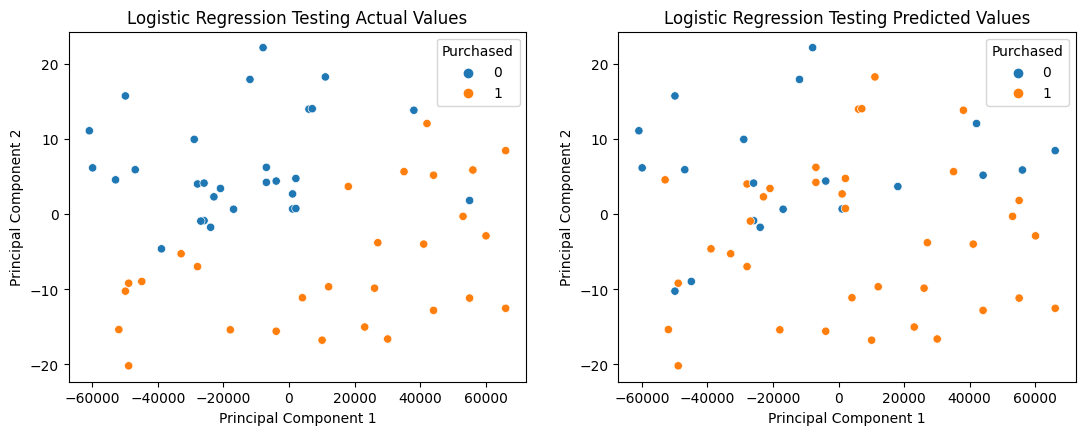

In [37]:
# PCA of Input Data
pca_data = pca.fit(x_test).transform(x_test)

# Create a figure for the subplots
plt.figure(figsize=(13, 10))

plt.subplot(2,2,1)

# Plot 1
# Actual Values in Testing Set
sns.scatterplot(x = pca_data[:,0], y = pca_data[:,1] , data = pca_data, hue = y_test )

# Adding Labels
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Adding Title
plt.title("Logistic Regression Testing Actual Values")

# Add a legend with a heading
legend = plt.legend(loc='upper right')
legend.set_title("Purchased")

plt.subplot(2,2,2)
# Plot 2
# Predicted Values in Testing Set
sns.scatterplot(x = pca_data[:,0], y = pca_data[:,1] , data = pca_data, hue = lr_Test_pred )

# Adding Labels
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Adding Title
plt.title("Logistic Regression Testing Predicted Values")

# Add a legend with a heading
legend = plt.legend(loc='upper right')
legend.set_title("Purchased")

## Since the accuracy is less we will use hyperparameter tuning using grid search

In [42]:
# To ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [51]:
# Define the hyperparameters and their possible values
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': [None, 'l2'],  # none or L2 regularization
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']  # Solver algorithms
}

# Create the logistic regression model
model = LogisticRegression(max_iter=10000)  # Increase max_iter if needed

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

print("Best Hyperparameters for the model according to Grid Search are:",best_params)

# Train a logistic regression model with the best hyperparameters
lr = LogisticRegression(**best_params, max_iter=10000)
lr.fit(x_train, y_train)

# Training Accuracy
lr_Train_pred = lr.predict(x_train)

print("\nTraining Accuracy of Logistic Regression Model after Hyperparameter Tuning is:", accuracy_score(y_train, lr_Train_pred)* 100)

# Testing Accuracy
lr_Test_pred = lr.predict(x_test)

print("\nTesting Accuracy of Logistic Regression Model after Hyperparameter Tuning is:", accuracy_score(y_test, lr_Test_pred)* 100)

Best Hyperparameters for the model according to Grid Search are: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}

Training Accuracy of Logistic Regression Model after Hyperparameter Tuning is: 85.08771929824562

Testing Accuracy of Logistic Regression Model after Hyperparameter Tuning is: 91.37931034482759


In [53]:
print("Classification Report of Logistic Regression after Hyperparameter Tuning is:\n\n", classification_report(y_test, lr_Test_pred))
print("Confusion Matrix after Hyperparameter Tuning is:\n\n", confusion_matrix(y_test, lr_Test_pred))

Classification Report of Logistic Regression after Hyperparameter Tuning is:

               precision    recall  f1-score   support

           0       1.00      0.83      0.91        29
           1       0.85      1.00      0.92        29

    accuracy                           0.91        58
   macro avg       0.93      0.91      0.91        58
weighted avg       0.93      0.91      0.91        58

Confusion Matrix after Hyperparameter Tuning is:

 [[24  5]
 [ 0 29]]


## Applying Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier()

# Training Classifier
dt.fit(x_train, y_train)

DecisionTreeClassifier()

## Testing Accuracy

In [ ]:
# Training Accuracy
dt_Train_pred = dt.predict(x_train)

print("Training Accuracy of Decision Tree Classifier Model is:", accuracy_score(y_train, dt_Train_pred)* 100)

# Testing Accuracy
dt_Test_pred = dt.predict(x_test)

print("\nTesting Accuracy of Decision Tree Classifier Model is:", accuracy_score(y_test, dt_Test_pred)* 100)

Training Accuracy of Decision Tree Classifier Model is: 100.0

Testing Accuracy of Decision Tree Classifier Model is: 86.20689655172413


## Seeing Other Measures

In [ ]:
print("Classification Report of Decision Tree Classifier Model is:\n\n", classification_report(y_test, dt_Test_pred))
print("Confusion Matrix is:\n\n", confusion_matrix(y_test, dt_Test_pred))

Classification Report of Decision Tree Classifier Model is:

               precision    recall  f1-score   support

           0       0.85      0.91      0.88        32
           1       0.88      0.81      0.84        26

    accuracy                           0.86        58
   macro avg       0.86      0.86      0.86        58
weighted avg       0.86      0.86      0.86        58

Confusion Matrix is:

 [[29  3]
 [ 5 21]]


## Decision Tree Classifier

## For Training Set

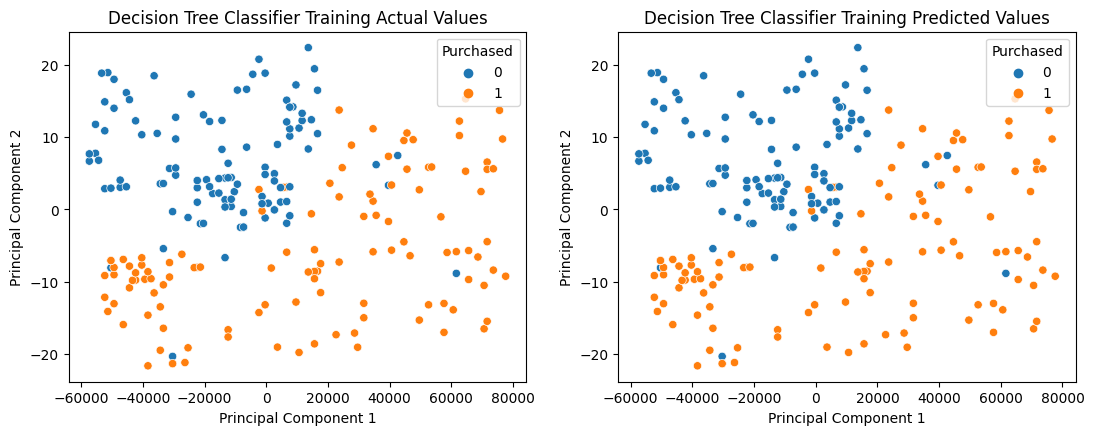

In [ ]:
# PCA of Input Data
pca_data = pca.fit(x_train).transform(x_train)

# Create a figure for the subplots
plt.figure(figsize=(13, 10))

plt.subplot(2,2,1)

# Plot 1
# Actual Values in Testing Set
sns.scatterplot(x = pca_data[:,0], y = pca_data[:,1] , data = pca_data, hue = y_train )

# Adding Labels
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Adding Title
plt.title("Decision Tree Classifier Training Actual Values")

# Add a legend with a heading
legend = plt.legend(loc='upper right')
legend.set_title("Purchased")

plt.subplot(2,2,2)
# Plot 2
# Predicted Values in Testing Set
sns.scatterplot(x = pca_data[:,0], y = pca_data[:,1] , data = pca_data, hue = dt_Train_pred )

# Adding Labels
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Adding Title
plt.title("Decision Tree Classifier Training Predicted Values")

# Add a legend with a heading
legend = plt.legend(loc='upper right')
legend.set_title("Purchased")

## For Testing Set

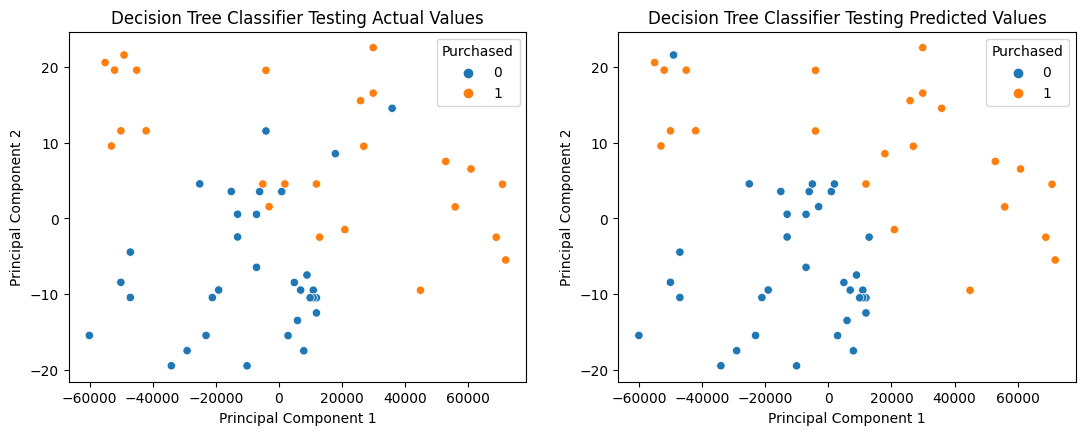

In [ ]:
# PCA of Input Data
pca_data = pca.fit(x_test).transform(x_test)

# Create a figure for the subplots
plt.figure(figsize=(13, 10))

plt.subplot(2,2,1)

# Plot 1
# Actual Values in Testing Set
sns.scatterplot(x = pca_data[:,0], y = pca_data[:,1] , data = pca_data, hue = y_test )

# Adding Labels
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Adding Title
plt.title("Decision Tree Classifier Testing Actual Values")

# Add a legend with a heading
legend = plt.legend(loc='upper right')
legend.set_title("Purchased")

plt.subplot(2,2,2)
# Plot 2
# Predicted Values in Testing Set
sns.scatterplot(x = pca_data[:,0], y = pca_data[:,1] , data = pca_data, hue = dt_Test_pred )

# Adding Labels
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Adding Title
plt.title("Decision Tree Classifier Testing Predicted Values")

# Add a legend with a heading
legend = plt.legend(loc='upper right')
legend.set_title("Purchased")

## Hyperparameter Tuning

In [52]:
# Define the hyperparameters and their possible values
param_grid = {
    'criterion': ['gini', 'entropy'],  # Split criterion
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None],  # Maximum number of features to consider for a split
    'splitter': ['best', 'random'],  # Strategy to choose the split at each node
}

# Create the Decision tree model
model = DecisionTreeClassifier()

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

print("Best Hyperparameters for the model according to Grid Search are:",best_params)

# Train a logistic regression model with the best hyperparameters
dt = DecisionTreeClassifier(**best_params)
dt.fit(x_train, y_train)

# Training Accuracy
dt_Train_pred = dt.predict(x_train)

print("\nTraining Accuracy of Decision Tree Classifier Model after Hyperparameter Tuning is:", accuracy_score(y_train, dt_Train_pred)* 100)

# Testing Accuracy
dt_Test_pred = dt.predict(x_test)

print("\nTesting Accuracy of Decision Tree Classifier Model after Hyperparameter Tuning is:", accuracy_score(y_test, dt_Test_pred)* 100)

Best Hyperparameters for the model according to Grid Search are: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}

Training Accuracy of Decision Tree Classifier Model after Hyperparameter Tuning is: 92.54385964912281

Testing Accuracy of Decision Tree Classifier Model after Hyperparameter Tuning is: 93.10344827586206


In [49]:
print("Classification Report of Decision Tree Classifier after Hyperparameter Tuning is:\n\n", classification_report(y_test, dt_Test_pred))
print("Confusion Matrix after Hyperparameter Tuning is:\n\n", confusion_matrix(y_test, dt_Test_pred))

Classification Report of Decision Tree Classifier after Hyperparameter Tuning is:

               precision    recall  f1-score   support

           0       1.00      0.83      0.91        29
           1       0.85      1.00      0.92        29

    accuracy                           0.91        58
   macro avg       0.93      0.91      0.91        58
weighted avg       0.93      0.91      0.91        58

Confusion Matrix after Hyperparameter Tuning is:

 [[24  5]
 [ 0 29]]
